In [515]:
# Let's start with calling all dependencies that we will use for this exercise 
import pandas as pd
import numpy as np
import math 

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf  # We will use this library to upload latest data from Yahoo API
%matplotlib inline
plt.style.use('fivethirtyeight')

In [516]:
# define the ticker you will use and Load the stock price data 
ticker = "MSFT"

start_date = "2012-12-12"  # Set the start date
end_date = "2023-06-20"

# Fetch stock price data
df = yf.download(ticker, start=start_date, end=end_date)

# Reset the index of the stock price data
df.reset_index(inplace=True)

df.columns



[*********************100%***********************]  1 of 1 completed


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

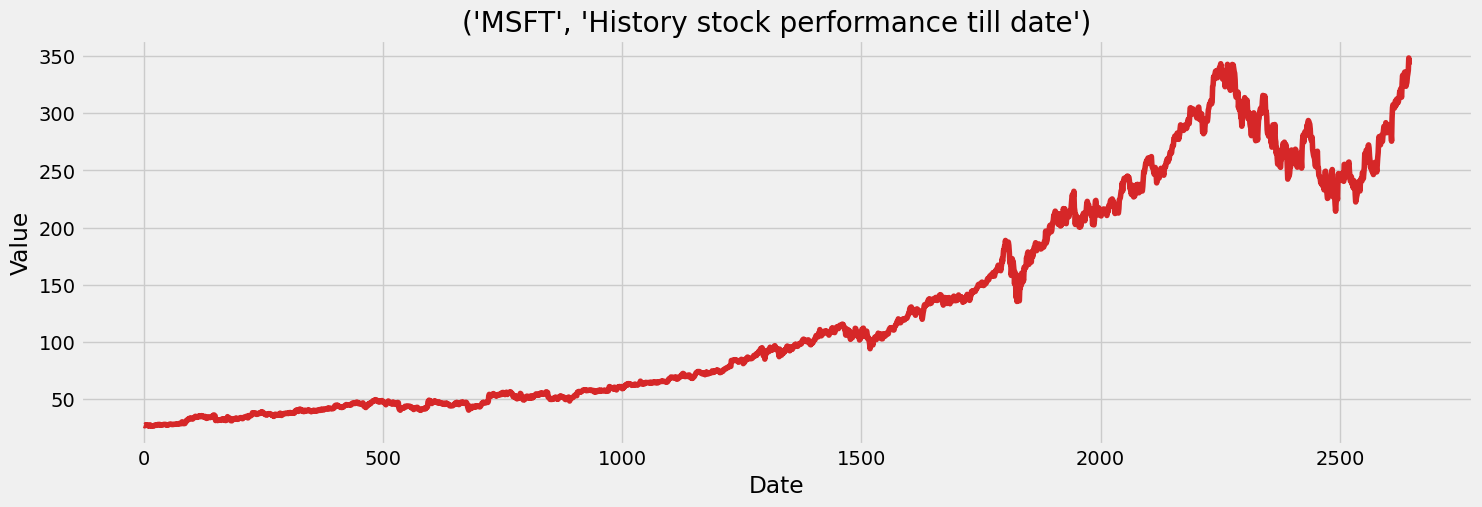

In [517]:
#Graph stock performance

import matplotlib.pyplot as plt

# defining x and y 
x = df.index
y = df['Close']

# Define your df_plot function
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

# Rest of your code

title = (ticker, "History stock performance till date")
df_plot(df, x, y, title=title, xlabel='Date', ylabel='Value', dpi=100)


In [518]:
#Get Economics Data, Sp500, yieldCurve, Fed_Funds, Unemp_Rate

import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns

fred = Fred(api_key='913a30c0a6fb90d5b099deae7bf62762')

## Importing series
## reformatting to a pandas df
## Converting to a monthly average

monthyl_yield_curve = pd.DataFrame(fred.get_series(
    'T10Y2Y',
    observation_start=start_date,
    observation_end=end_date)).resample("M").mean()

fed_funds_rate = pd.DataFrame(fred.get_series(
    'FEDFUNDS',
    observation_start=start_date,
    observation_end=end_date)).resample("M").mean()

unemployment_rate = pd.DataFrame(fred.get_series(
    'UNRATE',
    observation_start=start_date,
    observation_end=end_date)).resample("M").mean()

sp500 = pd.DataFrame(fred.get_series(
    'SP500',
    observation_start=start_date,
    observation_end=end_date)).resample("M").mean()

## Combining the dataframes into one dataframe

economicsData = pd.concat([monthyl_yield_curve,fed_funds_rate,unemployment_rate,sp500],axis=1)
economicsData.columns = ['Yield_Curve','Fed_Funds','Unemp_Rate','sp500']


# Reset the index of the interest rate data
economicsData.reset_index(inplace=True)

# Rename the 'DATE' column to 'Date'
economicsData.rename(columns={'index': 'Date'}, inplace=True)

economicsData.fillna(method='ffill', inplace=True)
economicsData.fillna(method='bfill', inplace=True)

missing_values = economicsData.isnull().sum()
print(missing_values)

economicsData

Date           0
Yield_Curve    0
Fed_Funds      0
Unemp_Rate     0
sp500          0
dtype: int64


,Date,Yield_Curve,Fed_Funds,Unemp_Rate,sp500
0,2012-12-31,1.507692,0.16,7.9,1668.675455
1,2013-01-31,1.649524,0.14,8.0,1668.675455
2,2013-02-28,1.716842,0.15,7.7,1668.675455
3,2013-03-31,1.701500,0.14,7.5,1668.675455
4,2013-04-30,1.526818,0.15,7.6,1668.675455
...,...,...,...,...,...
122,2023-02-28,-0.786842,4.57,3.6,4079.684737
123,2023-03-31,-0.639565,4.65,3.5,3968.559130
124,2023-04-30,-0.556000,4.83,3.4,4121.467368
125,2023-05-31,-0.558182,5.06,3.7,4146.173182


In [519]:
#Merge all data into one


merged_data = pd.merge(df, economicsData[['Date', 'Yield_Curve', 'Fed_Funds', 'Unemp_Rate', 'sp500']], on='Date', how='left')

merged_data.fillna(method='ffill', inplace=True)
merged_data.fillna(method='bfill', inplace=True)
missing_values = merged_data.isnull().sum()
print(missing_values)
merged_data.index

merged_data.tail(80)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
UNRATE       0
dtype: int64


,Date,Open,High,Low,Close,Adj Close,Volume,Yield_Curve,Fed_Funds,Unemp_Rate,sp500
2566,2023-02-23,255.559998,256.839996,250.479996,254.770004,254.214279,29219100,-0.676000,4.33,3.4,3960.656500
2567,2023-02-24,249.960007,251.000000,248.100006,249.220001,248.676376,24990900,-0.676000,4.33,3.4,3960.656500
2568,2023-02-27,252.460007,252.820007,249.389999,250.160004,249.614334,21190000,-0.676000,4.33,3.4,3960.656500
2569,2023-02-28,249.070007,251.490005,248.729996,249.419998,248.875946,22491000,-0.786842,4.57,3.6,4079.684737
2570,2023-03-01,250.759995,250.929993,245.789993,246.270004,245.732819,27565300,-0.786842,4.57,3.6,4079.684737
...,...,...,...,...,...,...,...,...,...,...,...
2641,2023-06-12,328.579987,332.100006,325.160004,331.850006,331.850006,24260300,-0.558182,5.06,3.7,4146.173182
2642,2023-06-13,334.470001,336.980011,330.390015,334.290009,334.290009,22951300,-0.558182,5.06,3.7,4146.173182
2643,2023-06-14,334.339996,339.040009,332.809998,337.339996,337.339996,26003800,-0.558182,5.06,3.7,4146.173182
2644,2023-06-15,337.480011,349.839996,337.200012,348.100006,348.100006,38899100,-0.558182,5.06,3.7,4146.173182


In [520]:
#Setup for regression analysis

x = merged_data[['Open', 'High','Low', 'Volume', 'Yield_Curve', 'Fed_Funds', 'Unemp_Rate', 'sp500']]
y = merged_data['Close']

# Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

# let's check if total observation makes sense
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(2249, 8)
(397, 8)
(2249,)
(397,)


In [521]:
#Perform regression analysis

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-5.84942446e-01  7.70685866e-01  8.18886791e-01 -1.35467770e-09
  5.03745763e-02  7.16389839e-02 -1.26692804e-02 -3.49191561e-04]
regression intercept 0.5376669045023732


In [522]:
# the coefficient of determination R²/ Cofidence of regression
regression_confidence = regression.score(train_x, train_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9999012663701711


In [523]:
#Calculate predicted price
predicted=regression.predict(test_x)

dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.tail(10)

,Actual_Price,Predicted_Price
2636,335.940002,338.236147
2637,333.679993,333.675536
2638,323.380005,327.203738
2639,325.260010,326.383457
2640,326.790009,329.220105
2641,331.850006,329.358124
2642,334.290009,333.958315
2643,337.339996,337.599528
2644,348.100006,347.663654
2645,342.329987,344.703645


In [524]:
#Print errors
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))


Mean Absolute Error (MAE): 1.5605071313475505
Mean Squared Error (MSE) : 4.200305652061678
Root Mean Squared Error (RMSE): 2.0494647233025693


In [525]:
#Acurracy of model
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)


The accuracy of the model is  99.94903226210481


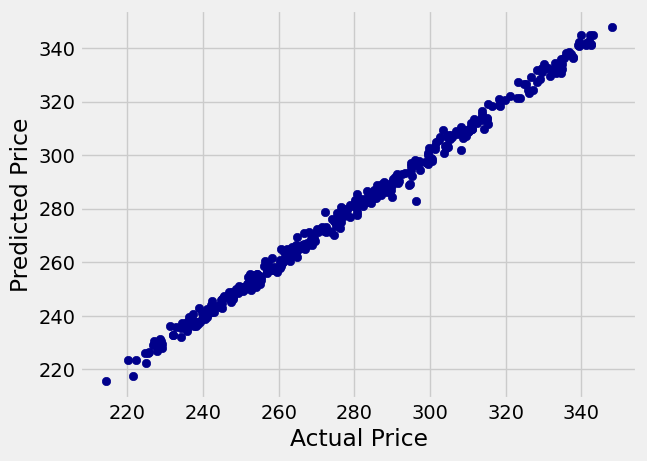

In [526]:
#Graph of actual and predicted price
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [527]:
# Print the current price, expected price, and actual price of the next day
current_price = df.iloc[-2]['Close']  # Current price is the second last row
next_day_actual_price = df.iloc[-1]['Close']
next_day_predicted_price = predicted[-1]

print("Current Price:", current_price)
print("Expected Price of Next Day:", next_day_predicted_price)
print("Actual Price of Next Day:", next_day_actual_price)


Current Price: 348.1000061035156
Expected Price of Next Day: 344.7036448595055
Actual Price of Next Day: 342.3299865722656


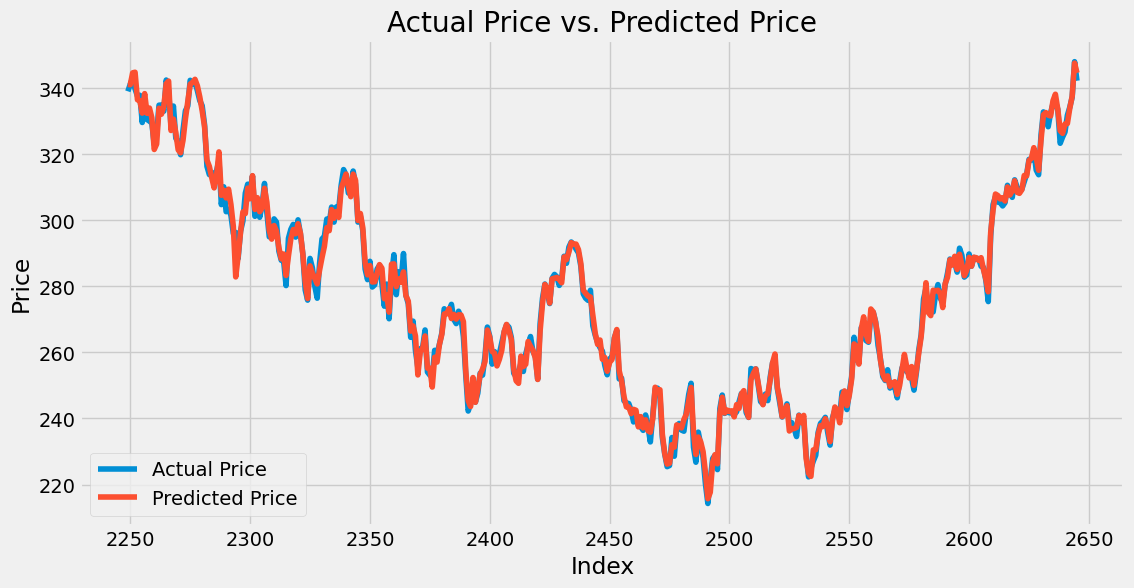

In [528]:
# Plotting the actual price and predicted price
plt.figure(figsize=(12, 6))
plt.plot(dfr.index, dfr['Actual_Price'], label='Actual Price')
plt.plot(dfr.index, dfr['Predicted_Price'], label='Predicted Price')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual Price vs. Predicted Price')
plt.legend()
plt.show()

In [529]:
import yfinance as yf

# Define the ticker symbol of the stock to analyze
tickerSymbol = ticker

# Set the start and end date of the historical data
startDate = '2019-01-01'
endDate = '2022-01-01'

# Retrieve the historical data for the stock
stockData = yf.Ticker(tickerSymbol).history(start=startDate, end=endDate)

# Calculate the financial ratios
marketCap = stockData['Close'][-1] * yf.Ticker(tickerSymbol).info['sharesOutstanding']
bookValue = yf.Ticker(tickerSymbol).info['bookValue']
Earnings = stockData['Close'][-1] / yf.Ticker(tickerSymbol).info['trailingEps']


pbRatio = stockData['Close'][-1] / bookValue
dividendYield = yf.Ticker(tickerSymbol).info['trailingAnnualDividendYield']
grossMargin = (stockData['Close'][-1] - stockData['Open'][0]) / stockData['Open'][0]
#returnOnEquity = yf.Ticker(tickerSymbol).info['returnOnEquity']
#debtToEquity = yf.Ticker(tickerSymbol).info['debtToEquity']

# Print the financial ratios
print('Market Capitalization:', marketCap)
print('Price-to-Earnings Ratio:', Earnings)
print('Price-to-Book Ratio:', pbRatio)
print('Dividend Yield:', dividendYield)
print('Gross Margin:', grossMargin)
#print(yf.Ticker(tickerSymbol).info.keys())

#print('Return on Equity:', returnOnEquity)
#print('Debt-to-Equity Ratio:', debtToEquity)


Market Capitalization: 2465909120321.1562
Price-to-Earnings Ratio: 35.930708764304576
Price-to-Book Ratio: 12.668669947839073
Dividend Yield: 0.007920203
Gross Margin: 2.493716876651636


In [530]:
#Ideas

#Look at death rates, population growth, food production

#look at amount of wars 

#look at earnings, expectings

#look at next earnings date

#for specific stock types look at assosiated for example; esg's look at polution, floods wildfires. For military socks look at tensions and war

#Look at institutional investors 

#used ai with news articles

#use ai to find ideal start date of when to look at each stock

https://medium.com/codex/stock-predication-using-regression-algorithm-in-python-fb8b426453b9